In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
import random

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

In [2]:
CUANTITATIVES = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'OverallQual', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


data = pd.read_csv('train.csv').drop(['Id'], axis = 1)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<AxesSubplot:>

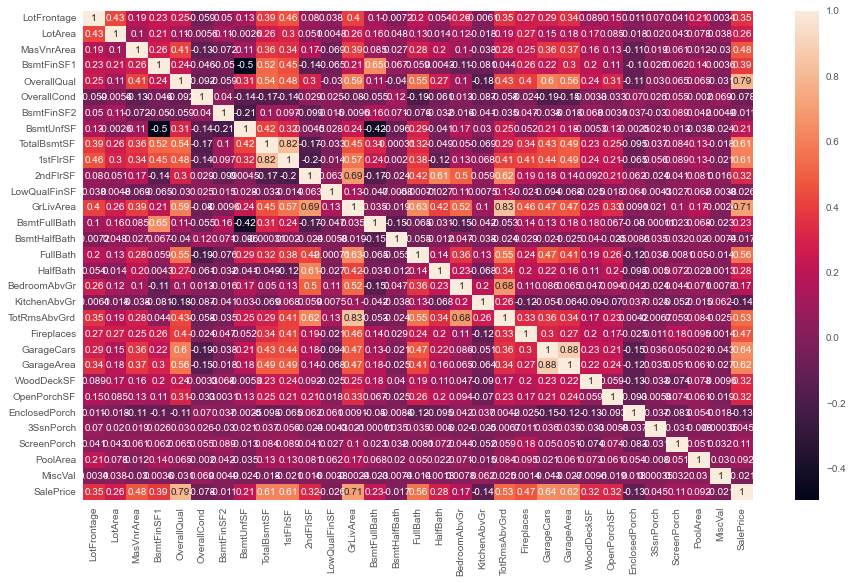

In [3]:
sns.heatmap(data[CUANTITATIVES].corr(), xticklabels=data[CUANTITATIVES].corr().columns, yticklabels=data[CUANTITATIVES].corr().columns, annot=True)


##### Basado en lo observado tomaremos 3 variables predictoras cuantitativas que tengan una correlación alta con SalePrice y que no estén relacionadas entre sí, estas son: GrLivArea, GarageCars y TotalBsmtSf. Se omiten GarageArea y 1stFlrSF ya que están correlacionadas fuertemente con algunas de las variables mencionadas con anterioridad.

In [4]:
y = data['SalePrice'] #La variable respuesta
X = data[['GrLivArea', 'GarageCars', 'TotalBsmtSF']] #El resto de los datos
random.seed(123)

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)


In [5]:

lm = LinearRegression()
lm.fit(X_train, y_train)
p_price_pred = lm.predict(X_test)
p_price_pred

array([166364.62704185, 200131.92727715, 246418.7464948 , 124016.46987958,
       134636.53700129, 170409.12137073, 181325.00952939, 176777.68632428,
       118084.59253344, 191523.24631389, 114944.94813342, 140344.03745851,
       182621.53363148, 138866.30028013, 232776.74532657, 123377.27282111,
       253775.62992213,  78945.66229506, 202143.14578646, 168386.48862823,
       288392.58831284, 179745.50438985, 196304.93665676, 193928.31458662,
        76089.64332205, 137593.24814298, 224716.56128392, 176161.17985398,
        63819.70537819, 112909.8226923 , 117195.0841629 , 191324.35776962,
       111733.37618824, 151076.99057688, 296844.93259879, 108407.97855016,
       299962.6677874 , 104196.97942537, 185712.55391117, 256986.10385157,
       199100.61174891, 148465.36898204, 160227.15562014, 212199.23833302,
       146781.7099775 , 267213.27290873, 211576.95580702, 166888.27733441,
        89175.76787788, 174062.55525399,  97922.53720541, 174667.64660012,
       164481.31944854, 1

#### Ecuación de la recta

In [6]:
#y = mx + c
# m = lm.coef_[0][0]
# c = lm.intercept_[0]


# label = r'$p_length = %0.4f*p_width %+0.4f$'%(m,c)
# print(label)
#lm.coef_

(lm.coef_,lm.intercept_)


(array([   62.69912279, 32507.84725117,    43.15448296]), -17312.959509915323)

$$SalePrice = 67.89GrLivArea + 28253.70GarageCars + 60.10TotalBsmtSF -36895.48$$

#### Como podemos observar esta ecuacion depende de multiples variables por lo que no se puede graficar ya que sería una gráfica en 4 dimensiones, sin embargo si se puede graficar cada una de las pendientes

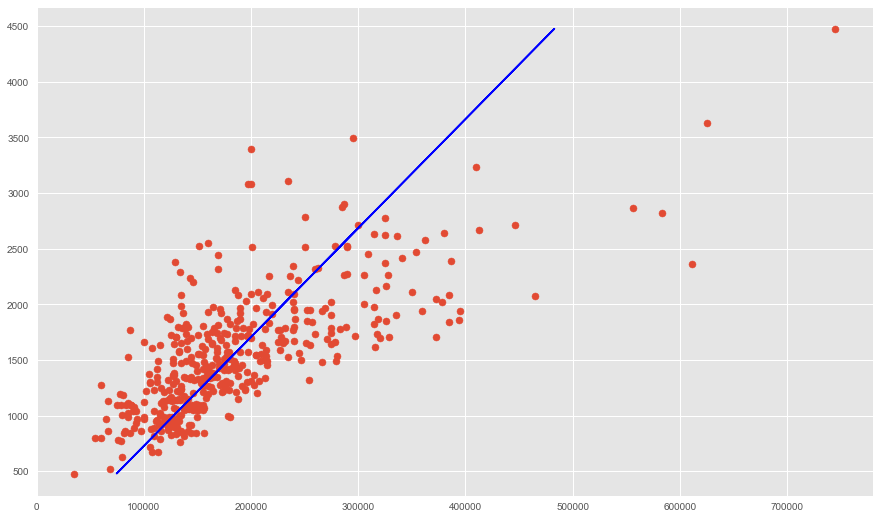

In [7]:
fig = plt.figure()

d = X_test['GrLivArea'].values.reshape(-1,1)

p_length = y_train.values.reshape(-1,1)
p_length_t = y_test.values.reshape(-1,1)
p_width = X_train['GrLivArea'].values.reshape(-1,1)
p_width_t = X_test['GrLivArea'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(p_width, p_length)
p_length_pred = lm.predict(d)


plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")

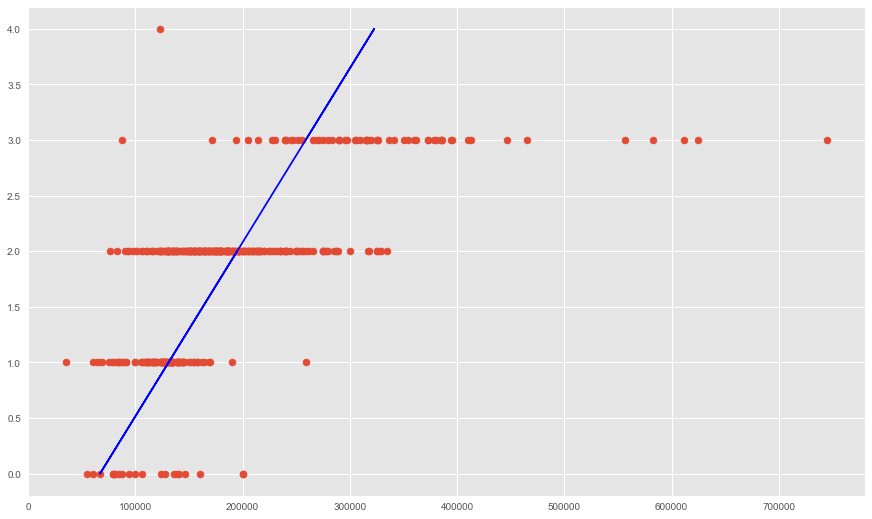

In [8]:
# fig = plt.figure()
# plt.scatter(data['SalePrice'], data['GarageArea'], color='red')


fig = plt.figure()

d = X_test['GarageCars'].values.reshape(-1,1)

p_length = y_train.values.reshape(-1,1)
p_length_t = y_test.values.reshape(-1,1)
p_width = X_train['GarageCars'].values.reshape(-1,1)
p_width_t = X_test['GarageCars'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(p_width, p_length)
p_length_pred = lm.predict(d)


plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")

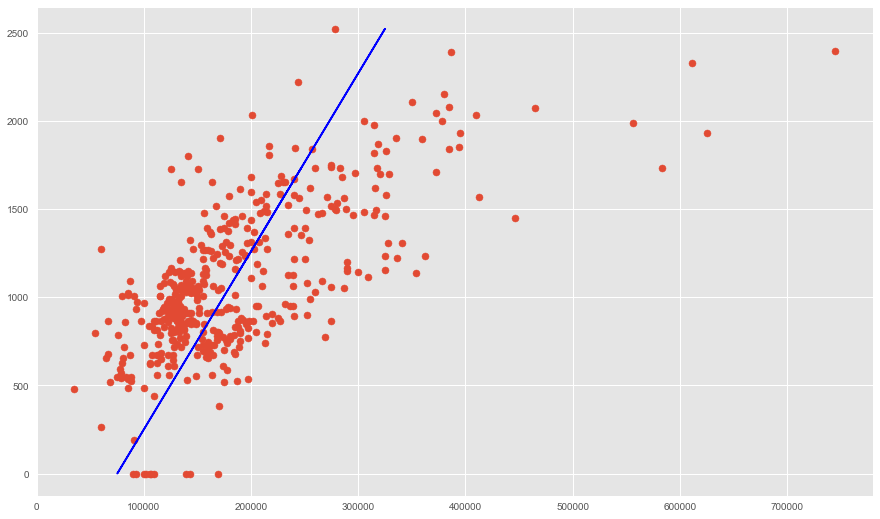

In [9]:
# fig = plt.figure()
# plt.scatter(data['SalePrice'], data['TotalBsmtSF'], color='red')

fig = plt.figure()

d = X_test['TotalBsmtSF'].values.reshape(-1,1)

p_length = y_train.values.reshape(-1,1)
p_length_t = y_test.values.reshape(-1,1)
p_width = X_train['TotalBsmtSF'].values.reshape(-1,1)
p_width_t = X_test['TotalBsmtSF'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(p_width, p_length)
p_length_pred = lm.predict(d)


plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")

In [11]:
meanSquaredError = mean_squared_error(p_length_t, p_length_pred)
rsqueared = r2_score(p_length_t, p_length_pred)

print("Mean Squared Error: %.2f" % meanSquaredError)
print("R Squared: %.2f" % rsqueared)

Mean Squared Error: 4409215081.25
R Squared: 0.43


### Analisis de Residuos

In [12]:
residuales = p_length_t - p_length_pred
len(residuales)

438

Text(0, 0.5, 'Residuales')

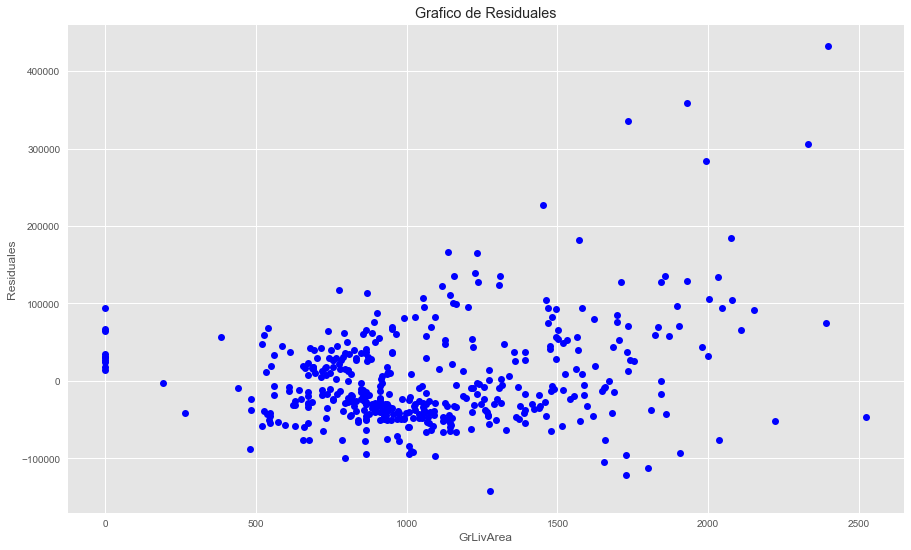

In [13]:
plt.plot(p_width_t, residuales, 'o', color='blue')
plt.title('Grafico de Residuales')
plt.xlabel('GrLivArea')
plt.ylabel('Residuales')

Text(0.5, 1.0, 'Histograma de Residuales')

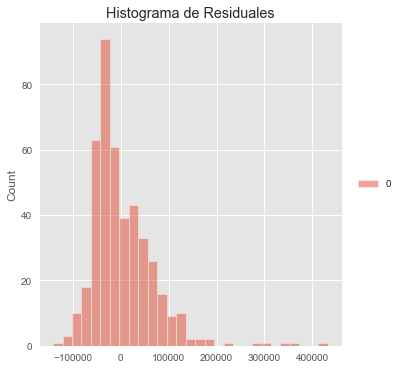

In [14]:
sns.displot(residuales)
plt.title("Histograma de Residuales")

{'whiskers': [<matplotlib.lines.Line2D at 0x2734be6e190>,
 'caps': [<matplotlib.lines.Line2D at 0x2734be6e730>,
 'boxes': [<matplotlib.lines.Line2D at 0x2734be5ee80>],
 'medians': [<matplotlib.lines.Line2D at 0x2734be6ecd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2734be6eee0>],
 'means': []}

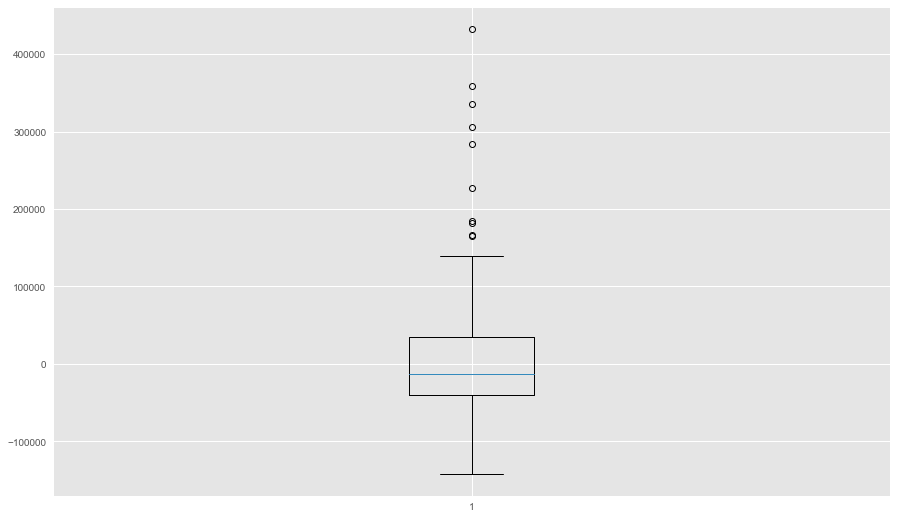

In [15]:
plt.boxplot(residuales)

In [16]:
normaltest(residuales)

NormaltestResult(statistic=array([212.84949731]), pvalue=array([6.03002235e-47]))

0.3364734452124908

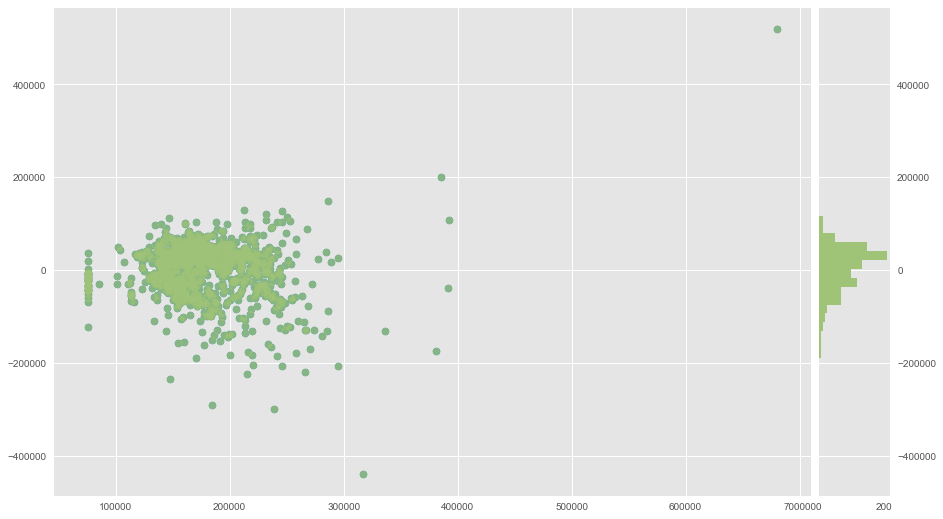

In [17]:
model = Ridge()
visualizer = ResidualsPlot(model, logx=True, logy=True)
visualizer.fit(p_width, p_length)
visualizer.score(p_width, p_length)